<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_002_eda_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Exploratory Data Analysis

To explore and visualize your loan default data, you can break down the process into the following steps. This strategy focuses on understanding the distribution, relationships, and key patterns within both categorical and numeric features. Here’s a structured approach:

### 1. **Understand the Data Structure**
   - **Inspect Data Types:** Identify which features are categorical and which are numeric. This will help decide the appropriate visualizations and analyses.
   - **Check for Missing Values:** Look for missing data and determine whether you need to fill, drop, or otherwise handle these missing values.
   - **Check for Duplicates:** Identify and handle any duplicate records if necessary.

### 2. **Distribution of Features**
   - **Univariate Analysis:**
     - For numeric features: Plot histograms, boxplots, and KDE plots to understand the distribution, outliers, and skewness.
     - For categorical features: Use bar plots or count plots to see the frequency distribution of each category.

### 3. **Explore Relationships Between Features**
   - **Bivariate Analysis:**
     - Numeric vs Numeric: Use scatter plots or pair plots (seaborn’s `pairplot`) to examine relationships between numeric features.
     - Categorical vs Numeric: Use box plots or violin plots to understand how numeric features vary across different categories.
     - Categorical vs Categorical: Use stacked bar charts or heatmaps to explore relationships between categorical features.

### 4. **Analyze Correlations**
   - **Correlation Matrix:** Compute and visualize the correlation matrix for numeric features using a heatmap. Pay attention to multicollinearity and strong correlations.
   - **Correlation with the Target Variable:** Focus on identifying features that are strongly correlated with the target variable (e.g., loan default status). This will guide feature selection.

### 5. **Outliers and Anomalies**
   - **Boxplots and Z-Scores:** Use boxplots and calculate Z-scores to detect and visualize outliers in numeric features.
   - **Targeted Outlier Detection:** Focus on outliers in features that are critical for predicting loan defaults.

### 6. **Target Variable Distribution**
   - **Class Balance:** If the target is binary (e.g., default/no default), plot the class distribution using a count plot or pie chart to assess class imbalance.

### 7. **Feature Interactions and Grouping**
   - **Interaction Plots:** For combinations of categorical features or combinations of categorical and numeric features, use interaction plots or grouped box plots.
   - **Pivot Tables or Grouped Aggregations:** Summarize numeric data by categories to observe trends, such as mean or median loan balances across different education levels.

### 8. **Feature Engineering Insights**
   - Identify potential new features based on the EDA results, such as ratios, binning numeric features, or interaction terms (e.g., combining income with payment history).

### 9. **Dimensionality Reduction (Optional for Visualization)**
   - **PCA or t-SNE:** Reduce the dimensionality of numeric data to visualize patterns and clusters. This can help in understanding the structure of the dataset.

### 10. **Final Summary and Reporting**
   - Summarize your findings, noting key patterns, correlations, and potential challenges like multicollinearity, outliers, or class imbalance.
   - Decide on the preprocessing steps needed based on your analysis (e.g., transformations, scaling, encoding).

### Visualization Summary:
- **Histograms, Boxplots, KDE Plots:** For distribution of numeric data.
- **Count Plots, Bar Plots:** For categorical data.
- **Scatter Plots, Pair Plots:** For numeric feature interactions.
- **Heatmaps:** For correlation analysis.
- **Class Balance Plots:** For target distribution.
- **Interaction Plots:** For combinations of categorical and numeric features.



## Load Clean & Preprocess Data

### 1. **Understand the Data Structure**
   - **Inspect Data Types:** Identify which features are categorical and which are numeric. This will help decide the appropriate visualizations and analyses.
   - **Check for Missing Values:** Look for missing data and determine whether you need to fill, drop, or otherwise handle these missing values.
   - **Check for Duplicates:** Identify and handle any duplicate records if necessary.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import load_and_preprocess_data, primary_columns, bill_columns, pay_columns, ordinal_columns, check_categorical_order
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['education', 'sex', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# print data overview
data_overview(X)

# Drop duplicate rows
X = X.drop_duplicates()

# Confirm the duplicates are removed
print(f"Number of Duplicate Rows After Dropping: {X.duplicated().sum()}")

# List of columns to check
pay_cols = [col for col in X.columns if col.startswith('pay_delay')]
# Check the order of categorical columns
check_categorical_order(X, categorical_columns + pay_cols)

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 56

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   limit_bal              30000 non-null  int64   
 1   sex                    30000 non-null  category
 2   education              30000 non-null  category
 3   marriage               30000 non-null  category
 4   age                    30000 non-null  int64   
 5   bill_amt_4_april       30000 non-null  int64   
 6   bill_amt_5_may         30000 non-null  int64   
 7   bill_amt_6_june        30000 non-null  int64   
 8   bill_amt_7_july        30000 non-null  int64   
 9   bill_amt_8_august      30000 non-null  int64   
 10  bill_amt_9_september   30000 non-null  int64   
 11  pay_amt_4_april        30000 non-null  int64   
 12  pay_amt_5_may          30000 non-null  int64   
 13  pay_amt_6_june     

## 2. **Distribution of Features**
   - **Univariate Analysis:**
     - For numeric features: Plot histograms, boxplots, and KDE plots to understand the distribution, outliers, and skewness.
     - For categorical features: Use bar plots or count plots to see the frequency distribution of each category.


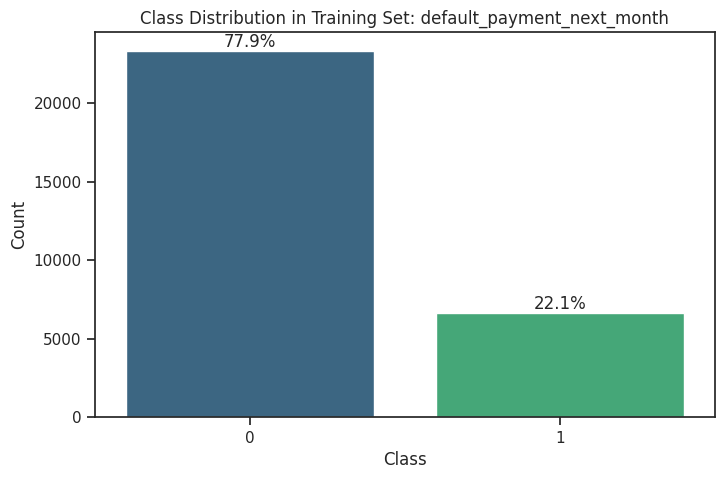

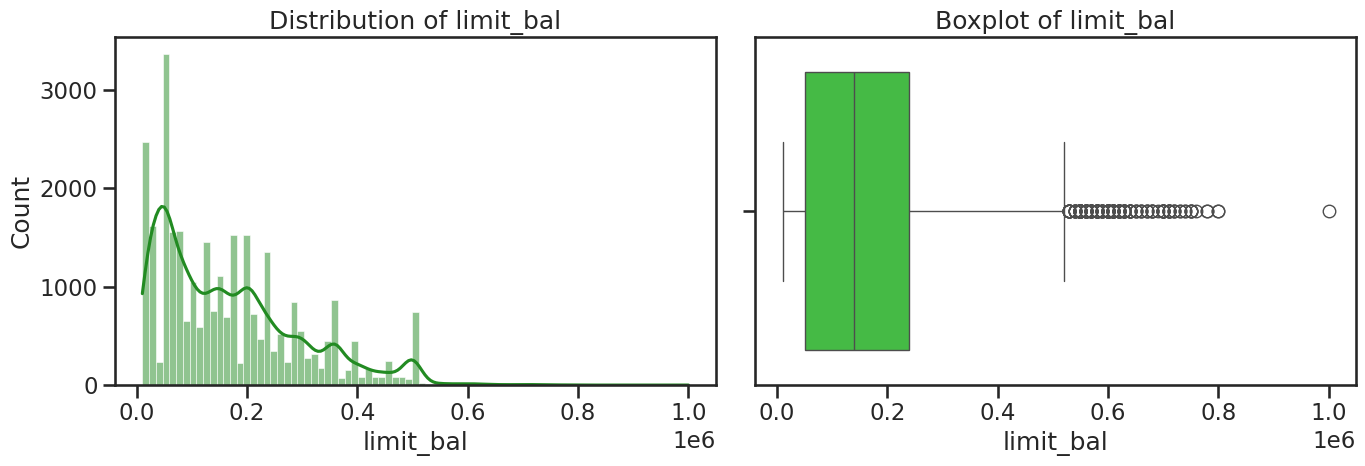

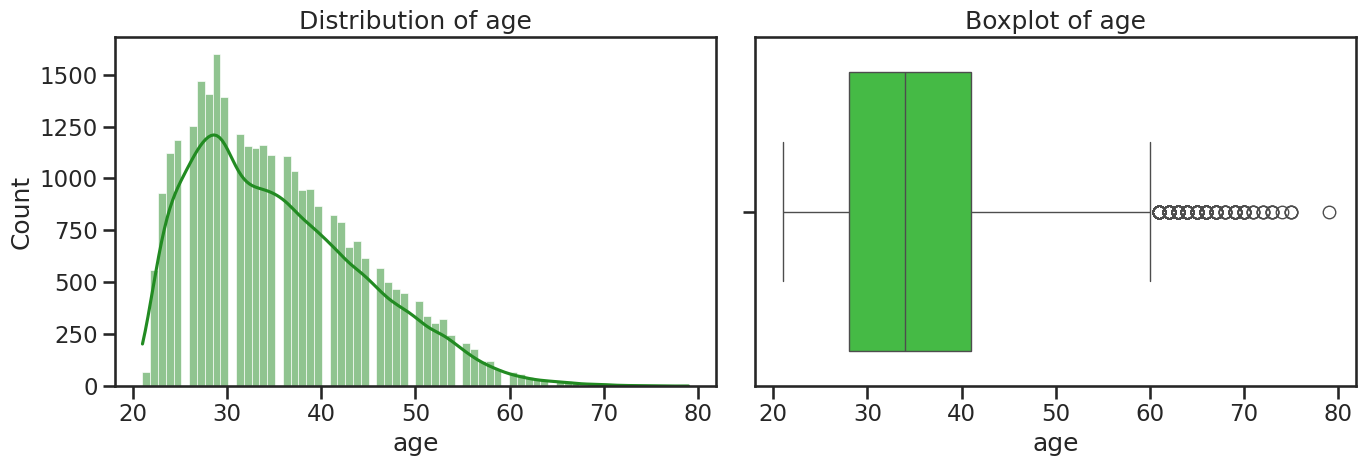

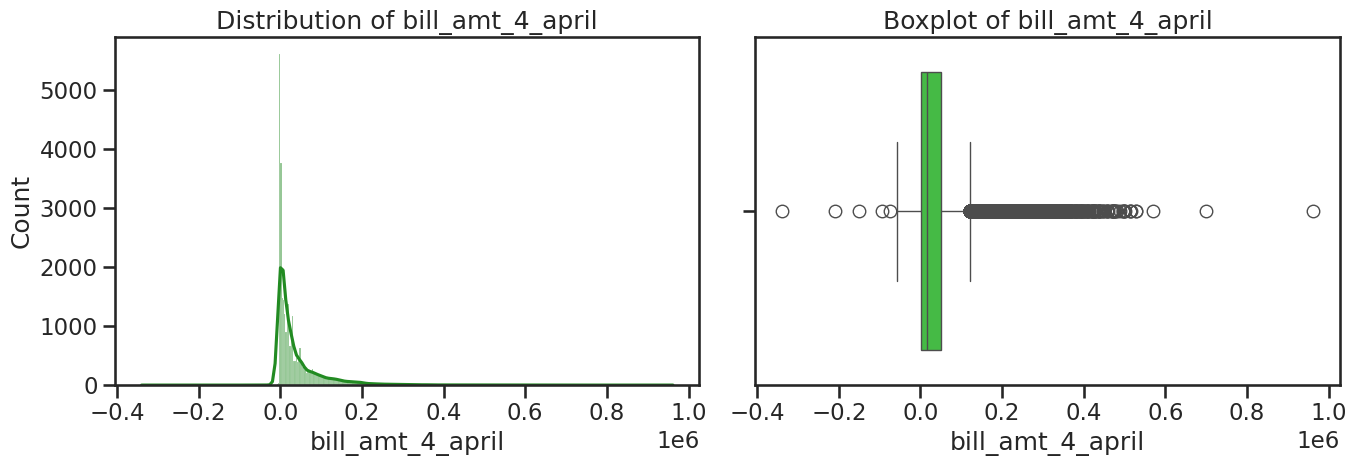

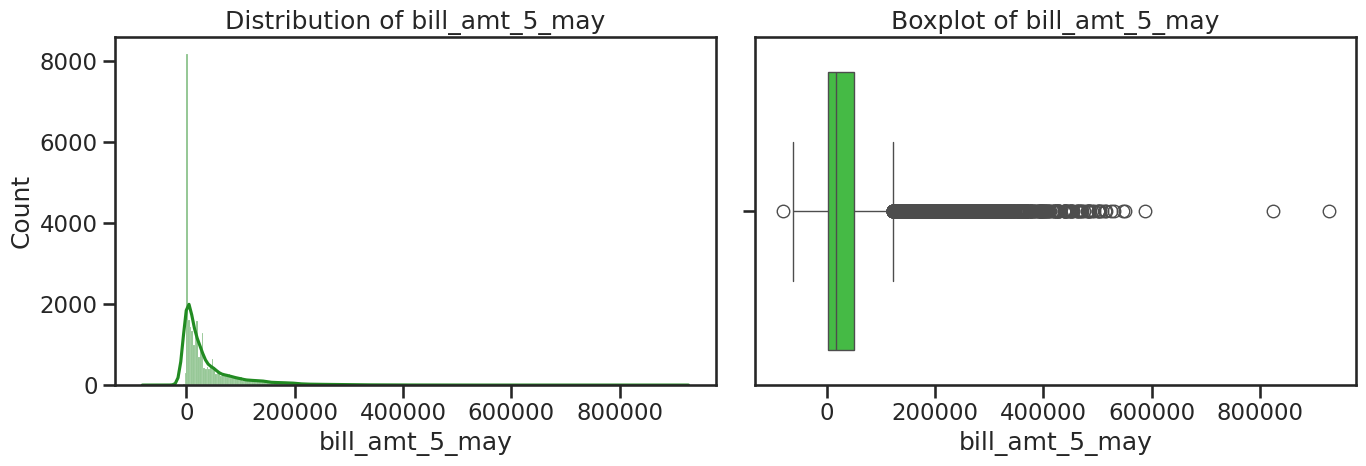

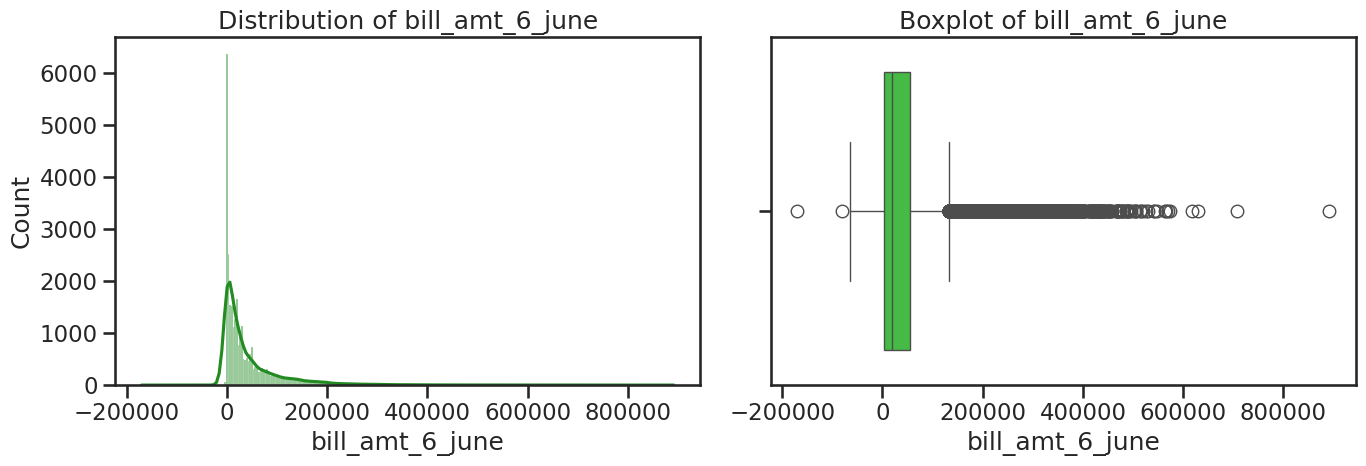

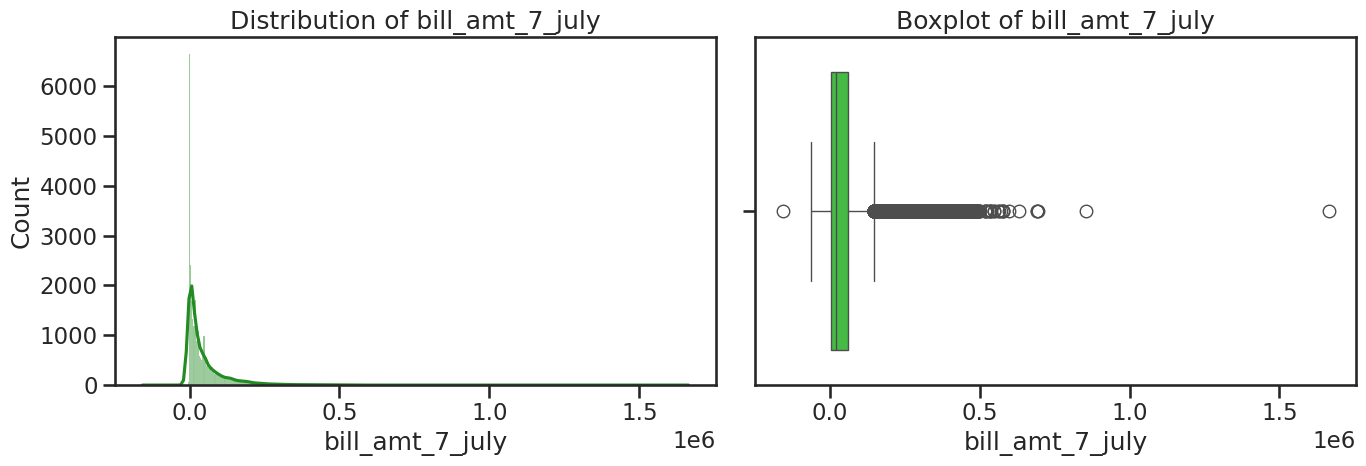

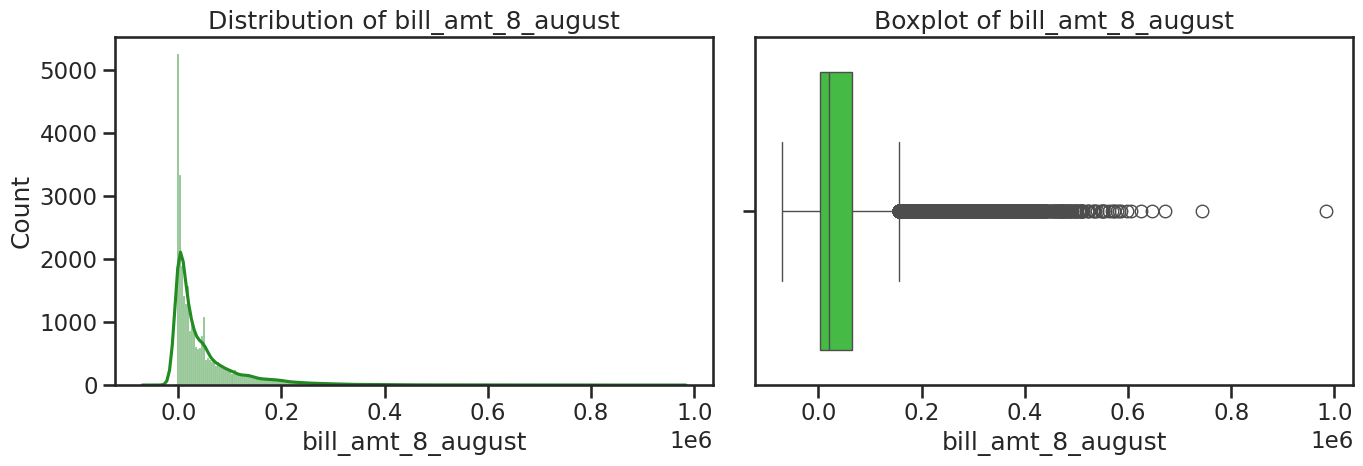

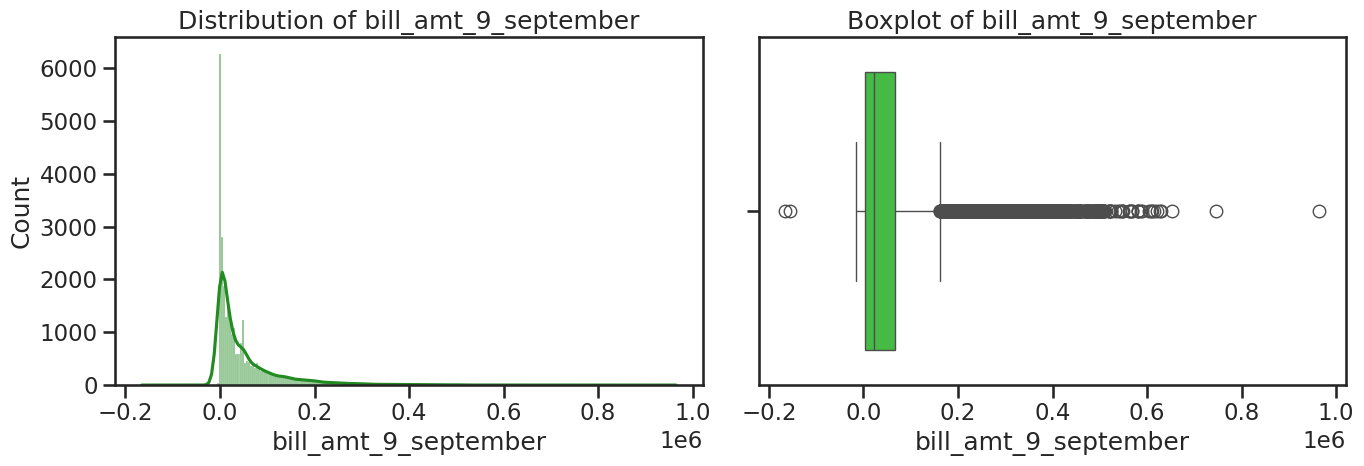

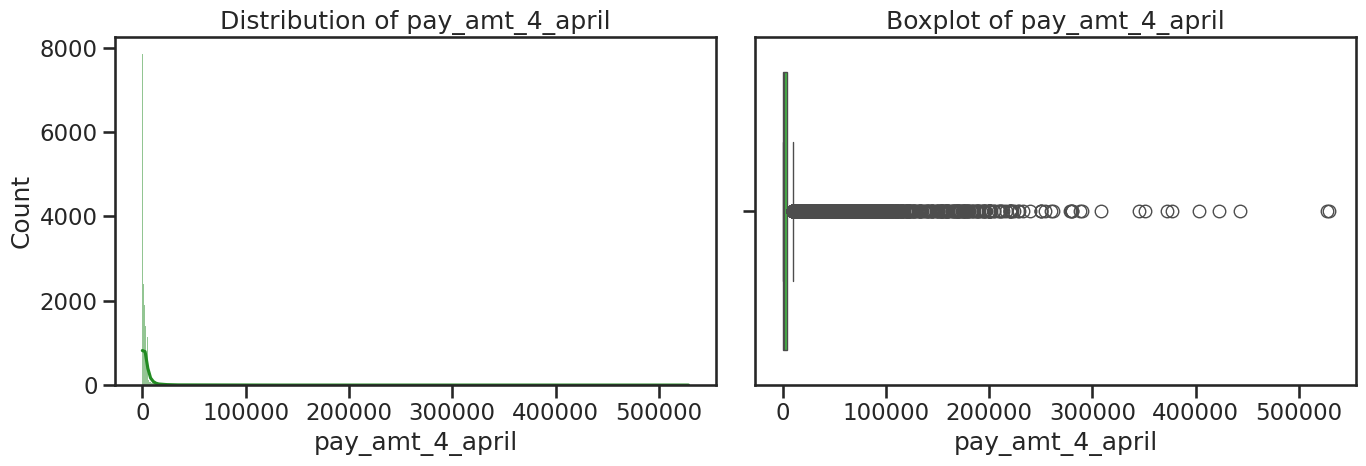

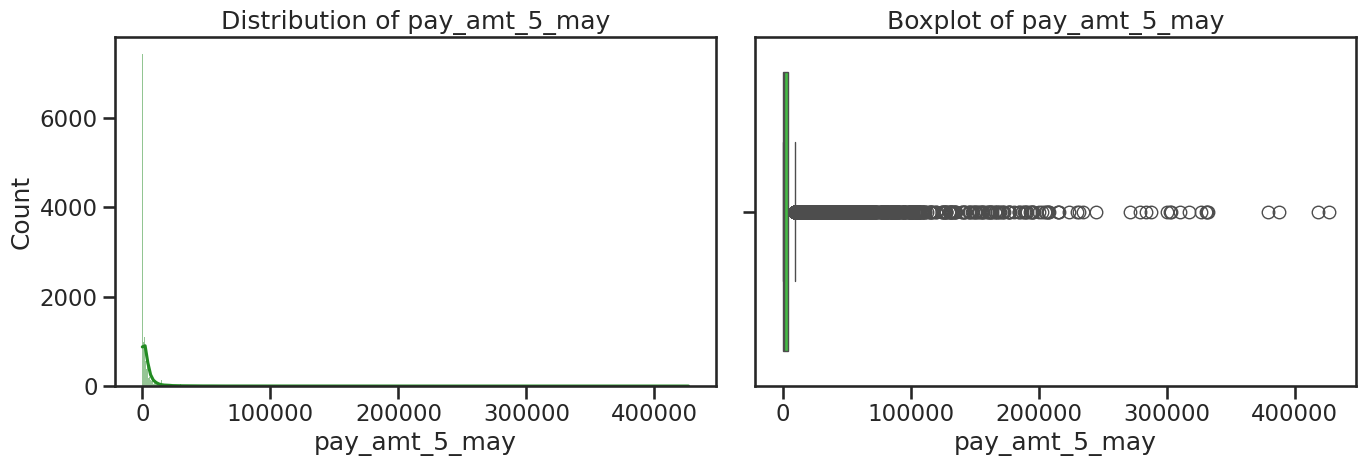

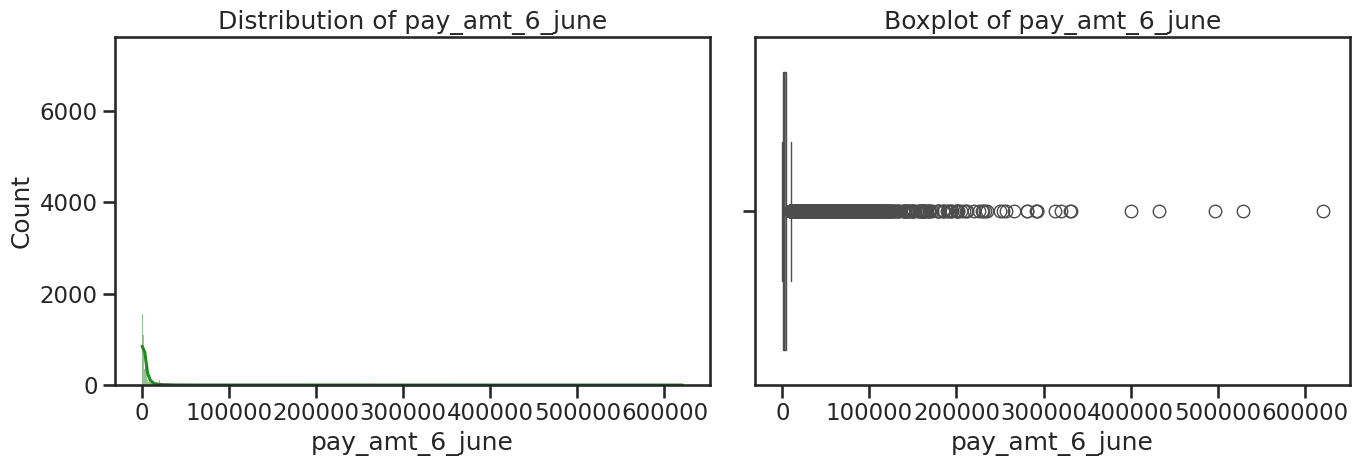

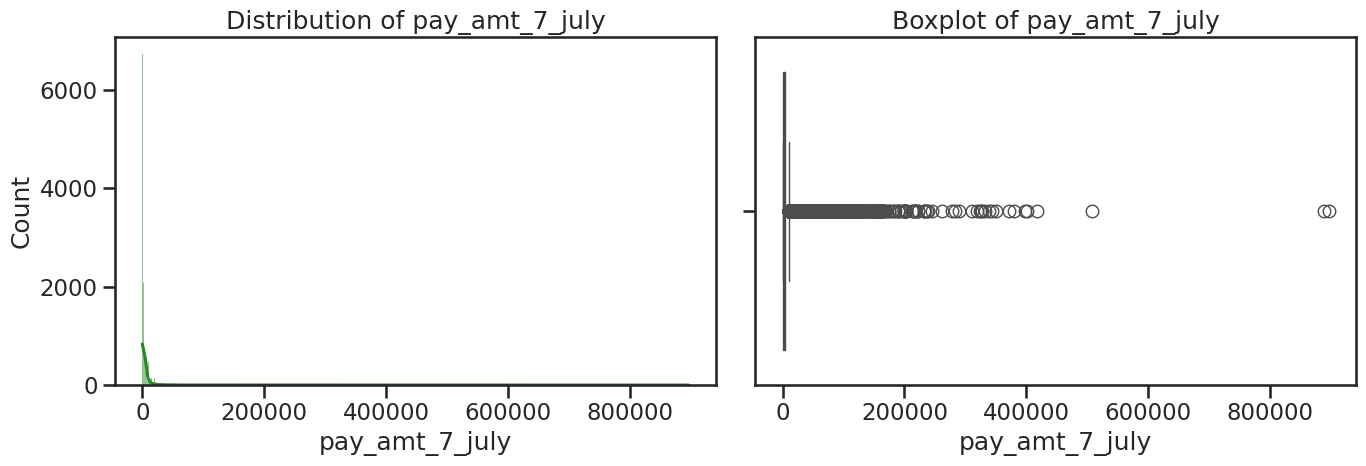

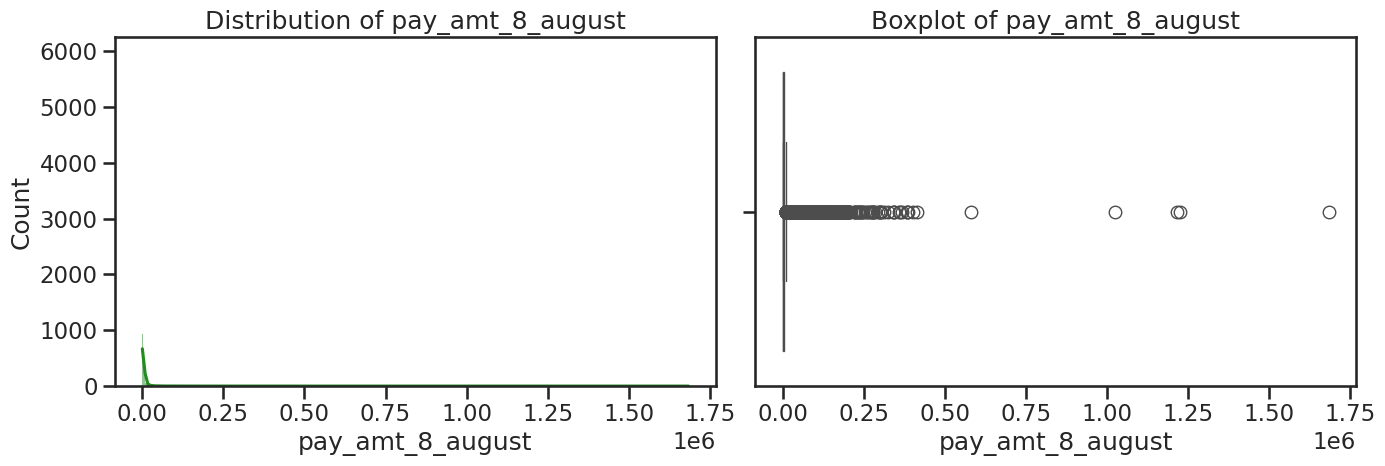

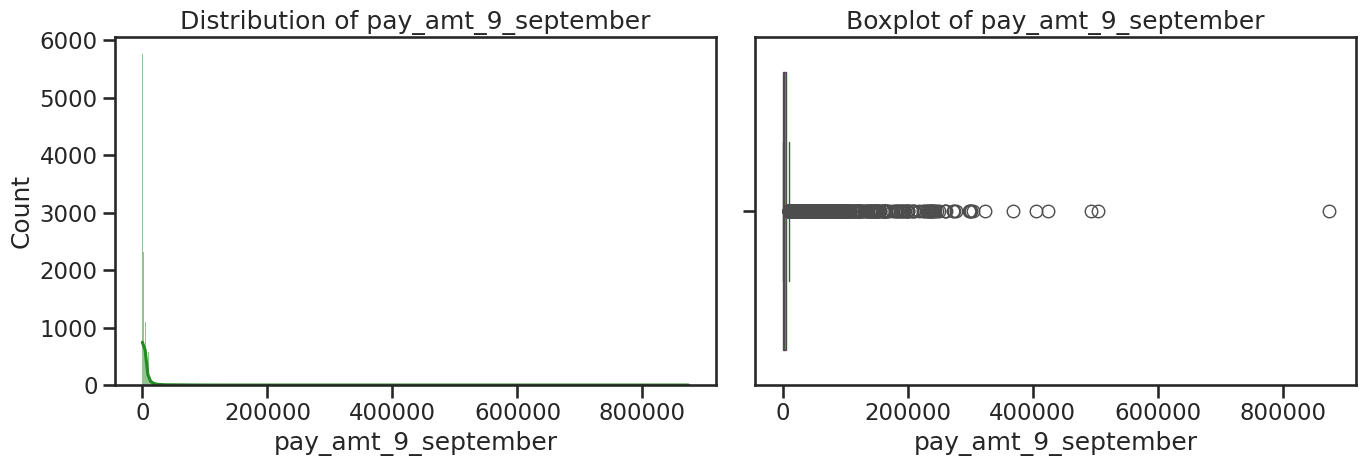

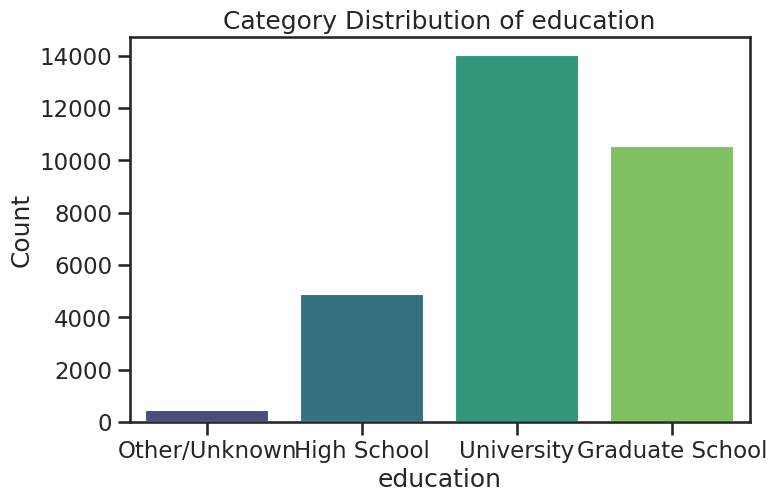

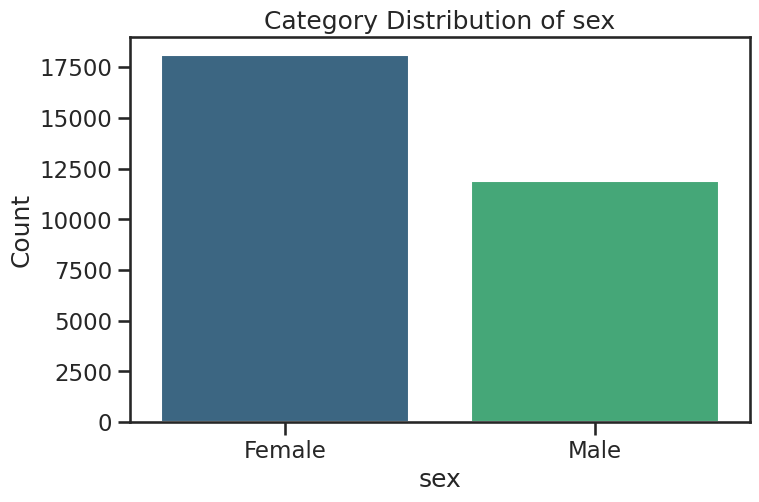

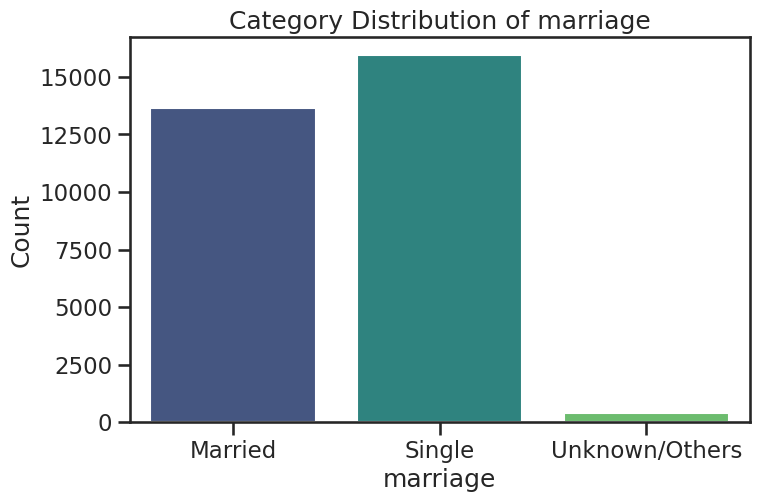

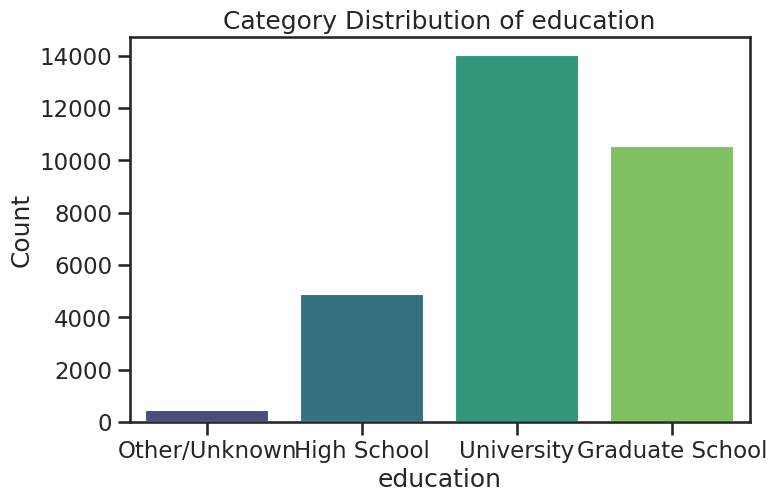

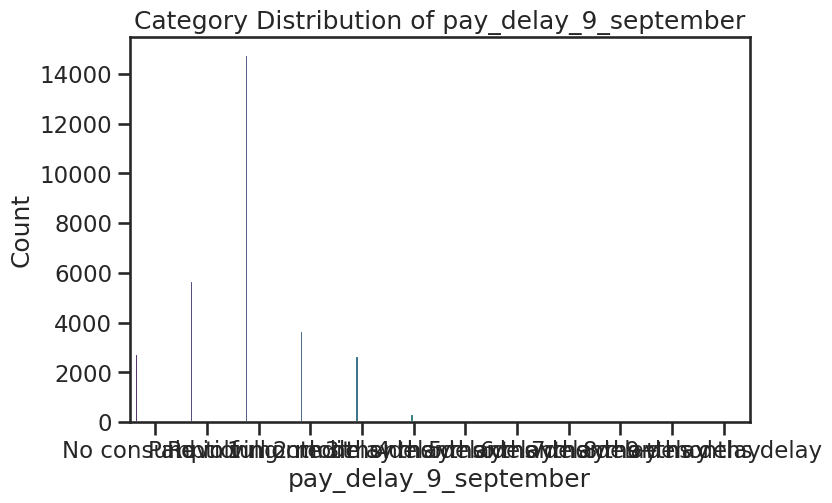

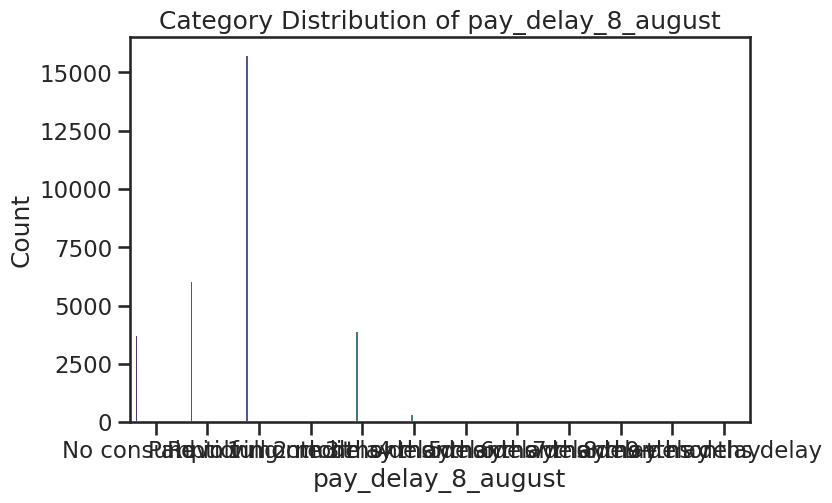

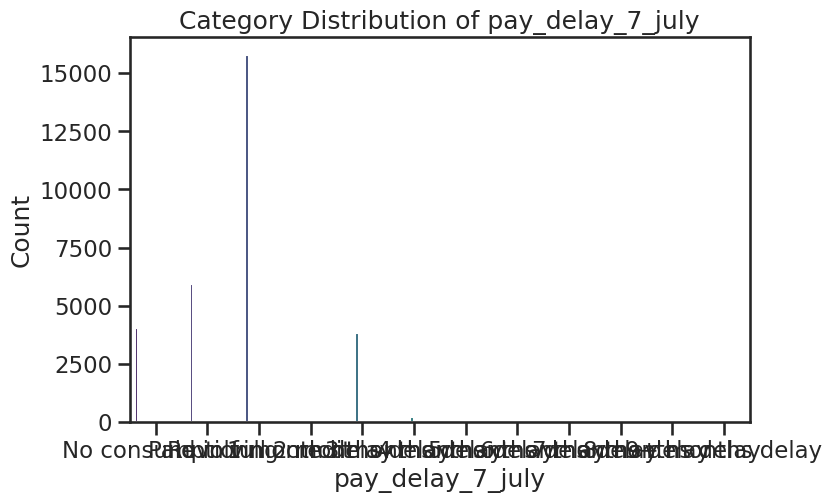

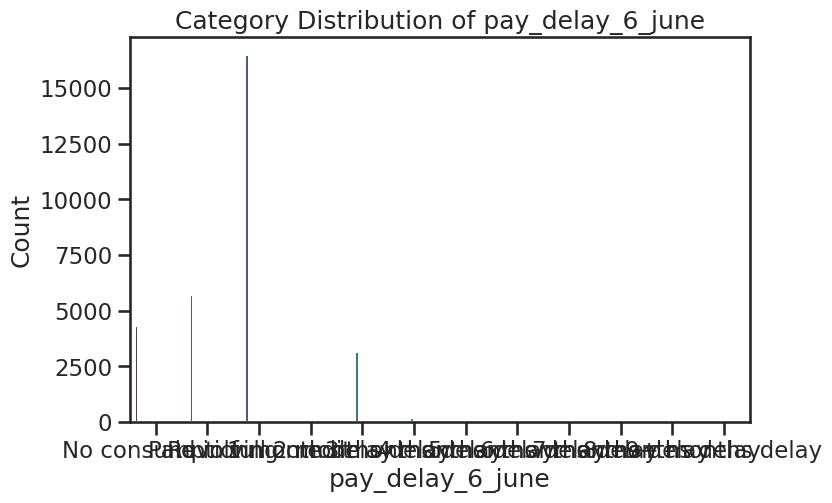

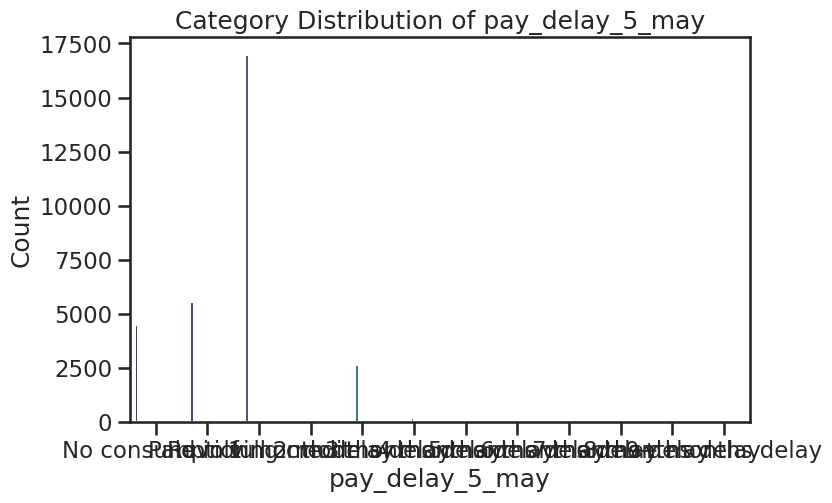

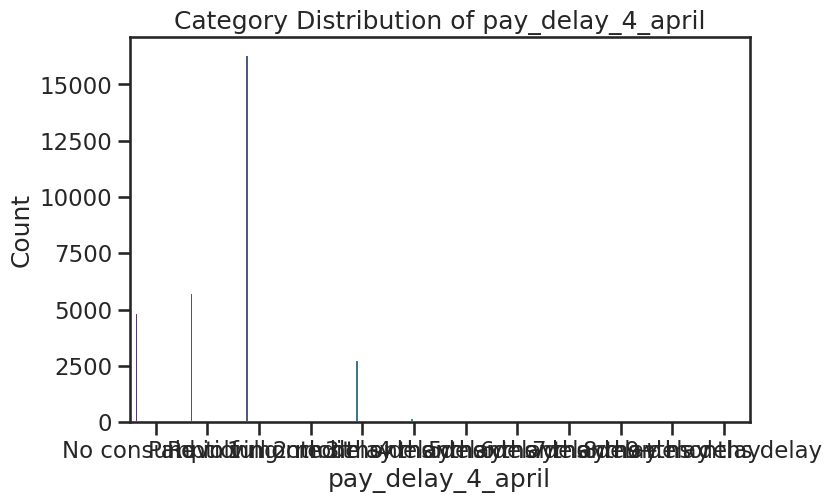

In [12]:
from eda_utils import data_overview, plot_class_distribution, plot_univariate_distributions

# plot target distribution
plot_class_distribution(y, target)
# Visualize the distributions
plot_univariate_distributions(X, categorical_columns + ordinal_columns)

### Outlier Inspection

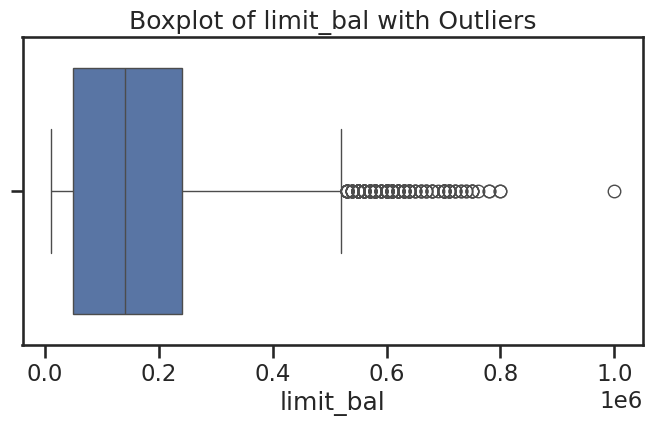

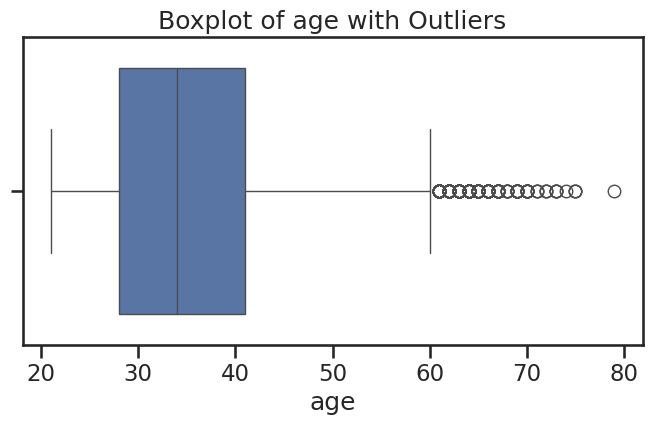

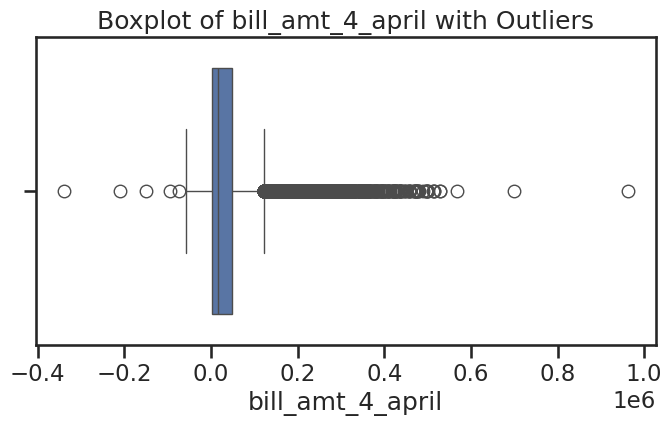

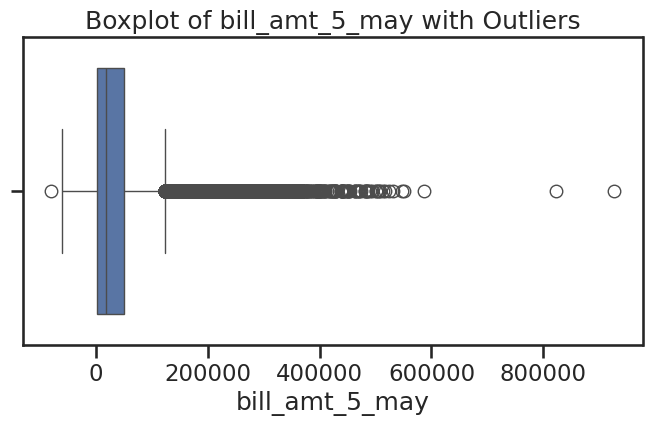

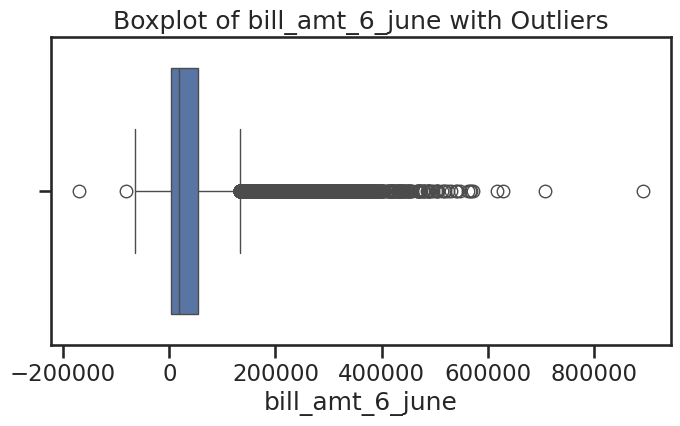

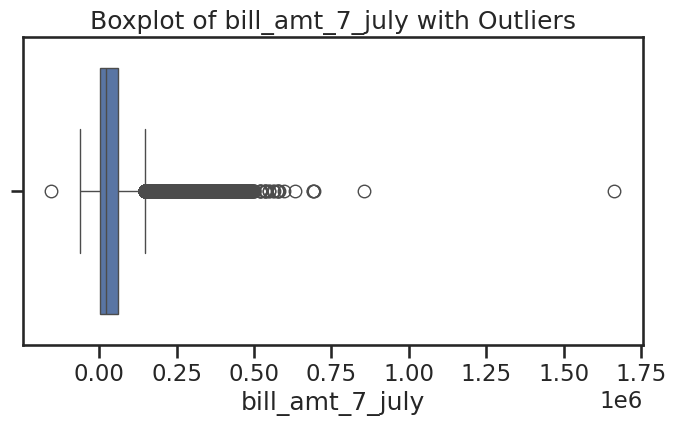

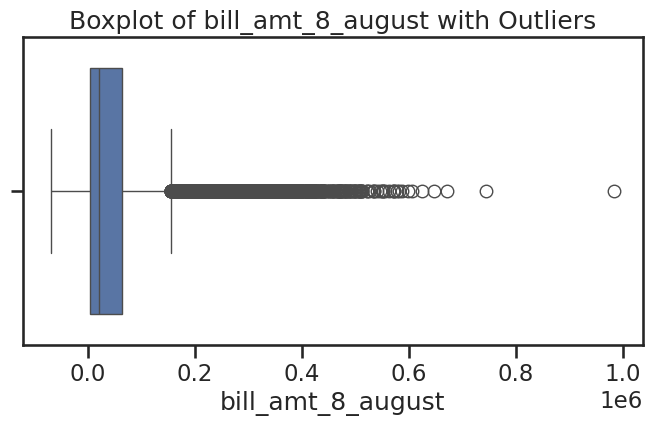

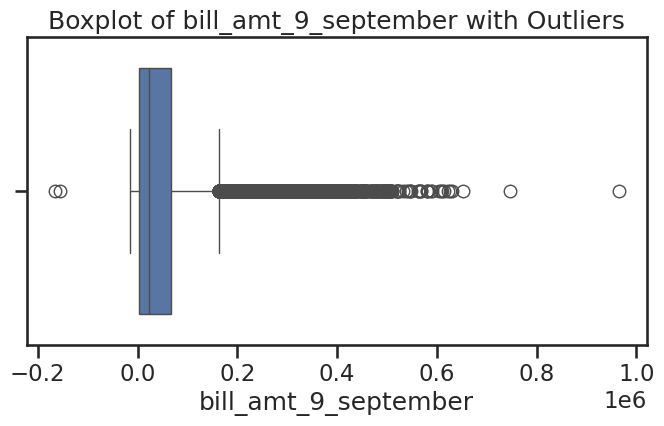

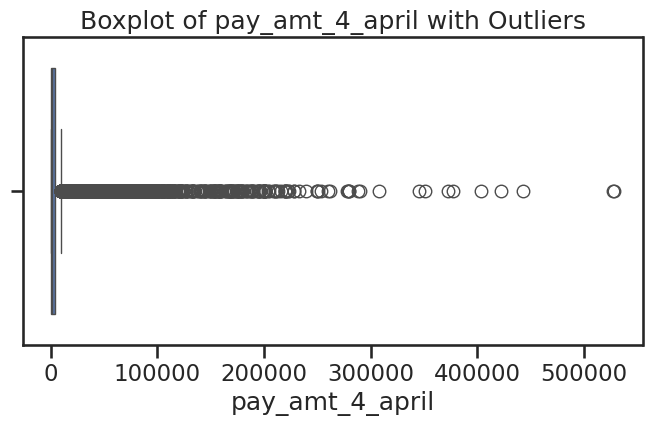

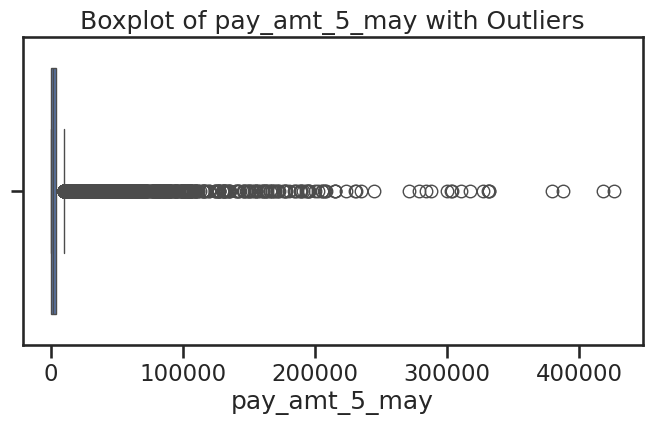

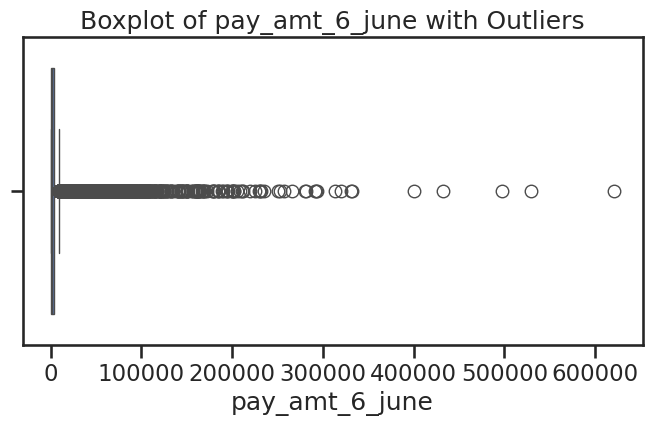

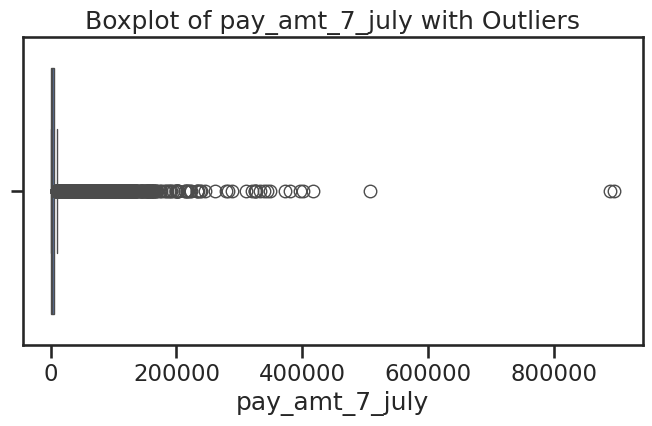

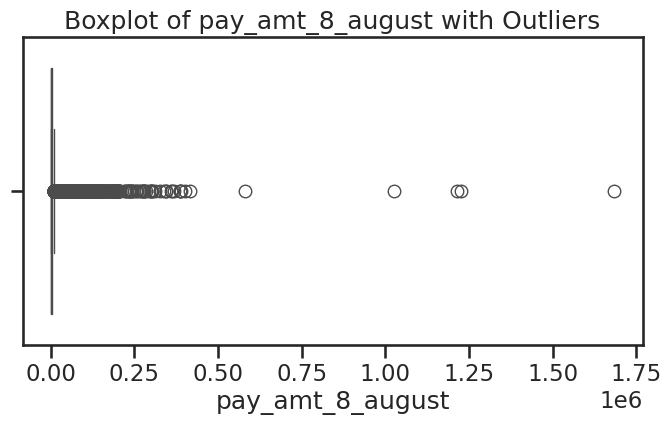

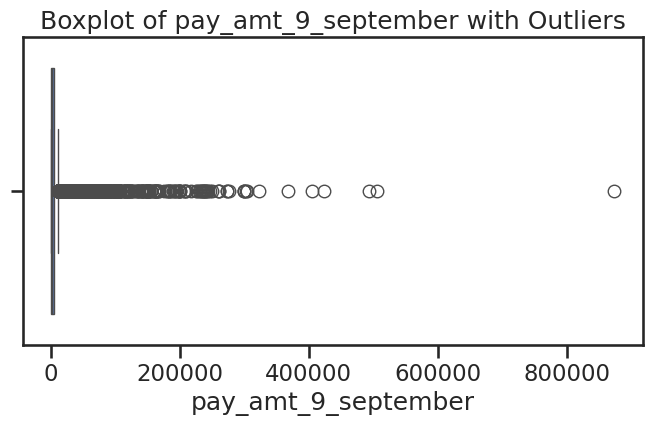

In [22]:
def identify_outliers(df):
    outliers_dict = {}

    # Loop through each numeric column
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # If there are outliers, add them to the dictionary
        if not outliers.empty:
            outliers_dict[col] = outliers[[col]]

    logging.info(f"Outliers identified in {len(outliers_dict)} columns.")
    return outliers_dict

# Example usage:
outliers = identify_outliers(X)

def inspect_outliers(outliers_dict):
    for col, outliers in outliers_dict.items():
        print(f"\nOutliers in column: {col}")
        print(outliers)

# inspect outliers
# inspect_outliers(outliers)

def plot_outliers(outliers_dict):
    for col in outliers_dict:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=X[col])
        plt.title(f"Boxplot of {col} with Outliers")
        plt.show()

# plot outliers
plot_outliers(outliers)

def summarize_outliers(outliers_dict):
    for col, outliers in outliers_dict.items():
        print(f"\nColumn: {col}")
        print(f"Number of Outliers: {len(outliers)}")
        print(f"Outlier Values:\n{outliers[col].values}\n")

# summarize outliers
# summarize_outliers(outliers)

### Are Outliers More Likely to Default?

The results show that the default rate is actually **lower** among the outliers compared to the non-outliers:

- **Default Rate by Outlier Status**:
  - **Non-Outliers**: 25.8%
  - **Outliers**: 15.2%

- **Number of Records**:
  - **Non-Outliers**: 19,494
  - **Outliers**: 10,450

### Interpretation:
1. **Lower Default Rate for Outliers**: The lower default rate among outliers suggests that, contrary to what might be expected, customers with outlier values in their financial metrics are less likely to default than those within the "normal" range. This could be an indication that the outliers represent customers with higher financial stability or more extreme but consistent financial behavior (e.g., high balances that they consistently pay off).

2. **Class Imbalance Considerations**: The number of outliers (10,450) is substantial, but still less than the number of non-outliers (19,494). This difference means that while outliers represent a significant portion of the dataset, the non-outliers are more prevalent.

3. **Implications for Modeling**:
   - **Outliers Might Not Be Predictive of Default**: Since the default rate is lower among outliers, simply identifying outliers may not be an effective way to predict default. In fact, treating outliers as a risky group may lead to biased decisions.
   - **Further Investigation Needed**: It would be beneficial to explore what specific features or behaviors define these outliers and why they are associated with a lower risk. It may be that certain financial behaviors are outliers but are actually markers of financial discipline or stability.

4. **Next Steps**:
   - **Explore Feature Interactions**: Investigate whether certain interactions between outlier features contribute to this trend.
   - **Profile the Outliers**: Break down the outlier group by other characteristics (e.g., education level, payment history) to understand who these customers are.
   - **Statistical Testing**: Perform a chi-square test (or similar) to see if the difference in default rates is statistically significant.

In conclusion, these results challenge the assumption that outliers are inherently riskier. Instead, they seem to reflect a group with lower default risk, highlighting the importance of data-driven insights rather than relying on assumptions about outliers.

Default Rate by Outlier Status:
is_outlier
False    0.258028
True     0.152344
Name: default, dtype: float64

Number of Records by Outlier Status:
is_outlier
False    19494
True     10450
Name: count, dtype: int64


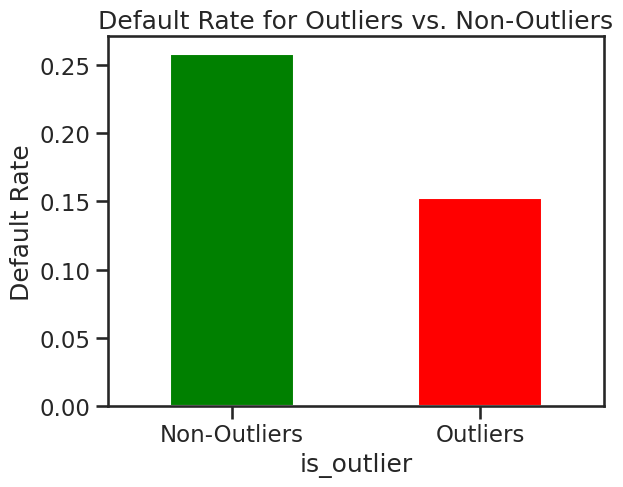

In [21]:
import pandas as pd
import numpy as np

def label_outliers(X, outliers_dict):
    # Create a new column 'is_outlier' initialized to False
    X['is_outlier'] = False

    for col, outliers in outliers_dict.items():
        X.loc[outliers.index, 'is_outlier'] = True

    return X

def analyze_default_rate(X, y):
    # Combine X and y into a single DataFrame
    data = X.copy()
    data['default'] = y

    # Group by the 'is_outlier' column and calculate the default rate
    default_rate_by_outlier = data.groupby('is_outlier')['default'].mean()
    count_by_outlier = data['is_outlier'].value_counts()

    print("Default Rate by Outlier Status:")
    print(default_rate_by_outlier)
    print("\nNumber of Records by Outlier Status:")
    print(count_by_outlier)

    # Plot the default rates
    default_rate_by_outlier.plot(kind='bar', color=['green', 'red'], title='Default Rate for Outliers vs. Non-Outliers')
    plt.ylabel('Default Rate')
    plt.xticks(ticks=[0, 1], labels=['Non-Outliers', 'Outliers'], rotation=0)
    plt.show()

# Label the outliers in the dataset
X_labeled = label_outliers(X, outliers)

# Analyze the default rates between outliers and non-outliers
analyze_default_rate(X_labeled, y)




### How Outlier Handling in a Pipeline Works:
If you handle outliers within an sklearn pipeline, the transformations (like clipping, removing, or scaling) are **fitted on the training data** and then **applied to the test data** during the `.transform()` step.

For example:
1. **During Training**:
   - The pipeline calculates the bounds (e.g., lower and upper limits) based on the training data.
   - It applies these bounds to the training data.

2. **During Testing**:
   - The same bounds (calculated from the training data) are applied to the test data without recalculating them.

### Implications of Removing Outliers in the Test Data:
1. **Risk of Data Leakage**:
   - If outliers are identified and removed based on the **entire dataset** (including test data), it leads to data leakage because information from the test set influences the model during training.
   - In a pipeline, the outlier handling step should only use information from the training data.

2. **Generalization Issues**:
   - If you apply the same outlier handling strategy to the test data (e.g., clipping), it could change the nature of the test data, making it inconsistent with real-world data, which might still have outliers.
   - For example, if your pipeline clips values in the test data based on training data bounds, the test data distribution might not reflect real-world scenarios.

3. **Bias in Model Evaluation**:
   - If your model never sees certain types of extreme values during training due to outlier removal, it might struggle to generalize when those extreme values appear in the real world.

### Best Practices for Outlier Handling in a Pipeline:
1. **Fit the Outlier Handling Only on Training Data**:
   - The outlier detection/removal step should be **fitted on the training data only** and applied consistently to both the training and test sets.
   - The `.fit()` step of the pipeline should calculate outlier thresholds (e.g., using IQR or quantiles) based only on the training data.

2. **Avoid Removing Outliers from the Test Set**:
   - You generally don’t want to completely remove outliers from the test set. Instead, use strategies like clipping or transforming extreme values to make the model robust while preserving the test data distribution.

3. **Understand Real-World Implications**:
   - If your model is deployed in a setting where outliers are common (e.g., finance), removing or transforming them can limit the model’s ability to handle such cases effectively. Be sure your outlier strategy aligns with your deployment environment.

### Example Implementation in a Pipeline:
```python
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='clip', lower_percentile=0.01, upper_percentile=0.99):
        self.strategy = strategy
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        if self.strategy == 'clip':
            self.lower_bound = X.quantile(self.lower_percentile)
            self.upper_bound = X.quantile(self.upper_percentile)
        return self

    def transform(self, X):
        if self.strategy == 'clip':
            X = np.clip(X, self.lower_bound, self.upper_bound)
        return X

# Use in a pipeline
pipeline = Pipeline([
    ('outlier_handler', OutlierHandler(strategy='clip')),
    # Add other preprocessing steps here
    # ('scaler', StandardScaler()),
    # ('model', SomeModel())
])
```

### Conclusion:
- **Handling outliers inside the pipeline** allows you to maintain a consistent workflow where the outlier strategy is applied uniformly during both training and testing.
- **Fit on training data only**: Always fit the outlier thresholds on the training data to avoid data leakage and ensure that the test data remains representative of real-world scenarios.
- **Avoid removing test data outliers**: Instead, consider transforming or clipping them to preserve the test set distribution.

By following these practices, you can avoid common pitfalls and ensure your model generalizes well.

Handling outliers can be done either inside an sklearn preprocessing pipeline or before passing the data to the pipeline. Here’s a breakdown of the two approaches to help you decide:

### 1. **Handling Outliers Inside an sklearn Pipeline**:
This approach integrates outlier handling as part of your preprocessing steps within the pipeline. It allows you to maintain a streamlined and consistent workflow where all data transformations are done within a single pipeline.

**Pros**:
- **Consistency**: Everything is handled in one place, making the pipeline reusable and easier to manage.
- **Modularity**: You can easily switch out or adjust outlier handling without affecting other preprocessing steps.

**Cons**:
- **Complexity**: Implementing custom outlier handling inside a pipeline might require creating custom transformers, which adds complexity.
- **Performance**: If your outlier detection is computationally intensive, it could slow down the pipeline.

**How to Implement It**:
You can use a custom transformer to handle outliers within the pipeline:
```python
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='clip', lower_percentile=0.01, upper_percentile=0.99):
        self.strategy = strategy
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        if self.strategy == 'clip':
            self.lower_bound = X.quantile(self.lower_percentile)
            self.upper_bound = X.quantile(self.upper_percentile)
        return self

    def transform(self, X):
        if self.strategy == 'clip':
            X = np.clip(X, self.lower_bound, self.upper_bound)
        return X

# Usage in a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('outlier_handler', OutlierHandler(strategy='clip')),
    # Add other preprocessing steps here
])
```

### 2. **Handling Outliers Before Passing Data to the Pipeline**:
In this approach, you detect and handle outliers in a separate preprocessing step before the data enters the sklearn pipeline. This gives you more flexibility and control over the outlier handling process.

**Pros**:
- **Flexibility**: You have more freedom to use advanced outlier detection methods (e.g., IQR, Z-score, Isolation Forest) without being constrained by the pipeline structure.
- **Easier Debugging**: Handling outliers outside the pipeline makes it easier to inspect and understand the changes before they go through the rest of the preprocessing steps.

**Cons**:
- **Inconsistent Workflow**: Having preprocessing steps outside the pipeline can make your workflow harder to manage and less reusable.
- **Reproducibility**: If outlier handling is done outside the pipeline, it might be harder to reproduce or apply the same steps consistently across different datasets.

**How to Implement It**:
You could handle outliers using a separate function:
```python
def handle_outliers(df, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    df = df.clip(lower_bound, upper_bound, axis=1)
    return df

# Usage before passing to the pipeline
X = handle_outliers(X)
```

### Recommendation:
- **If your goal is to keep everything modular and within a consistent pipeline**, handling outliers inside the sklearn pipeline is the better approach.
- **If you prefer more flexibility and want to apply advanced outlier detection methods**, handling outliers before passing the data to the pipeline might be more suitable.

**My Recommendation**: Start by handling outliers within the pipeline using a custom transformer. This keeps your workflow consistent and allows you to experiment with different strategies without needing to change your overall setup.

#### EDA Utils

In [11]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()



'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Loan Data Utils

In [4]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py
